In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_pickle('./data/final_df')

In [4]:
df.shape

(17168, 15)

In [5]:
df.head()

,WindSpeedX,WindSpeedY,WindSpeedZ,Kp,ap,0,1,2,3,4,5,6,7,8,9
0,1.487795,-0.359055,-6.386987,3.579217,7.013861,-0.478411,5.327612,3.880516,1.496256,0.547225,0.290276,1.396452,-0.043085,-0.015895,0.263997
1,1.152662,-1.184712,-4.362110,3.035520,4.670888,-7.719191,-9.171954,-6.021901,-8.260704,-2.091493,-1.590709,-1.242020,1.314685,-0.516834,0.771276
2,1.479125,-1.773211,-3.120826,2.764079,3.889897,-7.922941,-9.369014,-5.844717,-8.099330,-2.344532,-1.963089,-1.132759,1.329882,-0.545749,0.923759
3,1.258180,-2.165994,1.479697,1.405243,0.961181,-0.725512,3.627122,0.693456,0.105023,1.731850,0.614801,1.022090,0.650107,0.184201,-0.386600
4,2.196549,-1.937583,-0.392775,0.047223,-0.210305,-7.963528,-9.560413,-5.621810,-7.833228,-2.178333,-2.433747,-1.084654,1.261405,-0.699100,1.024394


In [6]:
X1 = df[["WindSpeedX", "WindSpeedY", "WindSpeedZ", "ap", "Kp"]]
X2 = df.iloc[:,7:10]
X = pd.concat((X2,X1), axis = 1)

In [7]:
print(X.shape)
print(X.columns)
X = X.values

(17168, 8)
Index([2, 3, 4, 'WindSpeedX', 'WindSpeedY', 'WindSpeedZ', 'ap', 'Kp'], dtype='object')


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, int(len(X)*0.8)):
    X_train.append(X[i-60:i, :])
    y_train.append(X[i, 7])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 8))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 8)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=5,            
                               restore_best_weights=True)  

regressor.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping]) 

Epoch 1/20
342/342 [==============================] - 40s 93ms/step - loss: 0.0182 - val_loss: 0.0152
Epoch 2/20
342/342 [==============================] - 34s 98ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 3/20
342/342 [==============================] - 33s 96ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 4/20
342/342 [==============================] - 30s 89ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 5/20
342/342 [==============================] - 30s 87ms/step - loss: 0.0088 - val_loss: 0.0079
Epoch 6/20
342/342 [==============================] - 33s 96ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 7/20
342/342 [==============================] - 35s 101ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 8/20
342/342 [==============================] - 36s 106ms/step - loss: 0.0082 - val_loss: 0.0074
Epoch 9/20
342/342 [==============================] - 36s 107ms/step - loss: 0.0079 - val_loss: 0.0073
Epoch 10/20
342/342 [==============================] - 31s 91ms/step - loss: 0.

108/108 [==============================] - 5s 25ms/step


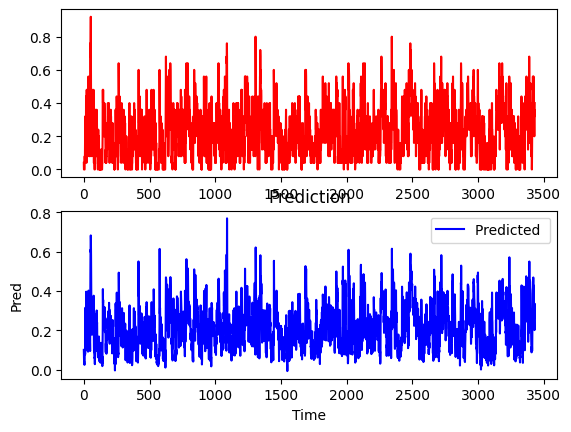

In [7]:
X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i, :])
    y_test.append(X[i, 7])
X_test, y_test = np.array(X_test), np.array(y_test)

y_pred = regressor.predict(X_test)

plt.subplot(2,1,1)
plt.plot(y_test, color = 'red', label = 'Test')
plt.subplot(2,1,2)
plt.plot(y_pred, color = 'blue', label = 'Predicted ')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Pred')
plt.legend()
plt.show()

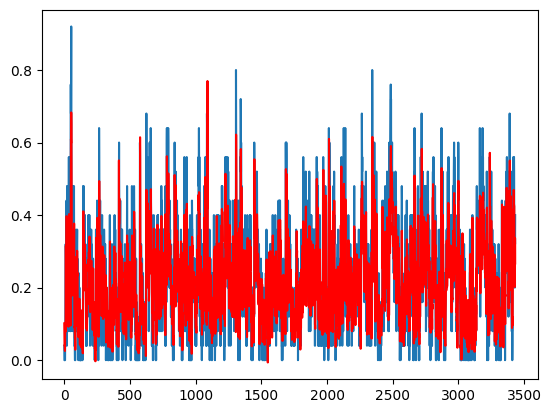

In [8]:
plt.plot(y_test)
plt.plot(y_pred,c='r')

In [9]:
regressor.save("./chekpoint_models/1d_single_output_model")  # Save the first model

INFO:tensorflow:Assets written to: ./chekpoint_models/1d_single_output_model\assets


INFO:tensorflow:Assets written to: ./chekpoint_models/1d_single_output_model\assets


In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, int(len(X)*0.8)):
    X_train.append(X[i-60:i, :])
    y_train.append(X[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 8))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 8)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 8))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=5,            
                               restore_best_weights=True)  

regressor.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping]) 


X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i, :])
    y_test.append(X[i, :])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = regressor.predict(X_test)

Epoch 1/20
342/342 [==============================] - 52s 119ms/step - loss: 0.0116 - val_loss: 0.0054
Epoch 2/20
342/342 [==============================] - 35s 102ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 3/20
342/342 [==============================] - 34s 99ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 4/20
342/342 [==============================] - 35s 104ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 5/20
342/342 [==============================] - 34s 101ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 6/20
342/342 [==============================] - 40s 116ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 7/20
342/342 [==============================] - 35s 101ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/20
342/342 [==============================] - 32s 94ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 9/20
342/342 [==============================] - 33s 97ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/20
342/342 [==============================] - 31s 91ms/step - loss:

In [17]:
min_value = sc.data_min_
max_value = sc.data_max_

# Output the minimum and maximum values for each feature
print("Minimum values:", min_value)
print("Maximum values:", max_value)

Minimum values: [-11.33246925 -12.76872399  -9.74134376  -4.7401374   -6.23831739
  -9.2235927   -0.79604853  -1.31161263]
Maximum values: [26.58069319 21.66530859 11.86779838  6.03737562  7.01297084 10.10170904
 22.24318534  5.48093496]


In [56]:
X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i, :])
    y_test.append(X[i, :])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = regressor.predict(X_test)

108/108 [==============================] - 2s 21ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

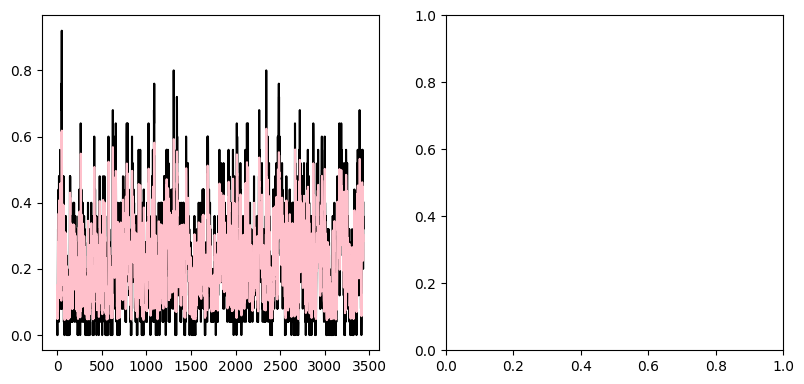

In [41]:
plt.figure(figsize=(20,20))
for j in range(1,9):
    plt.subplot(4,4,j)
    plt.plot(y_test[:,j-1], color = "black")
    plt.plot(y_pred[:,j-1], color = "pink")
plt.show()

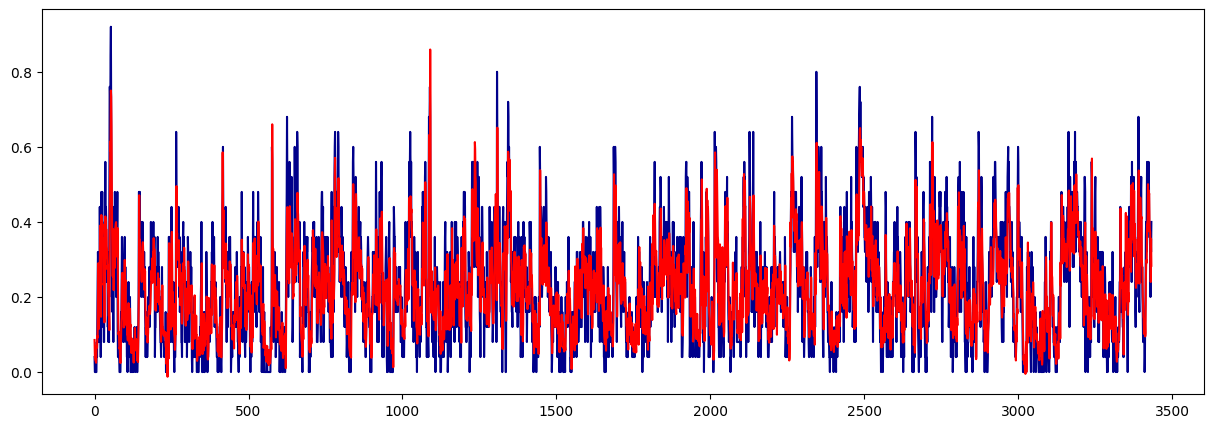

In [12]:
plt.figure(figsize=(15,5))
plt.plot(y_test[:,7], color = "darkblue")
plt.plot(y_pred[:,7], color = "red")
plt.show()

In [13]:
regressor.save("./chekpoint_models/8d_output_model")  # Save the second model

INFO:tensorflow:Assets written to: ./chekpoint_models/8d_output_model\assets


INFO:tensorflow:Assets written to: ./chekpoint_models/8d_output_model\assets


In [18]:
X1 = df[["WindSpeedX", "WindSpeedY", "WindSpeedZ", "ap", "Kp"]]
X2 = df.iloc[:,7:10]

# Concatenate X1 and X2 horizontally
X = result = pd.concat([X1, X2], axis=1)
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [19]:
print(X.columns)
X = X.values

Index(['WindSpeedX', 'WindSpeedY', 'WindSpeedZ', 'ap', 'Kp', 2, 3, 4], dtype='object')


#### REQUIRED TRAIN CODE

In [8]:
X1 = df[["WindSpeedX", "WindSpeedY", "WindSpeedZ", "ap", "Kp"]]
X2 = df.iloc[:,7:10]

# Concatenate X1 and X2 horizontally
X = result = pd.concat([X1, X2], axis=1)
print(type(X))

print(X.columns)
X = X.values

X = X[:,4]
print(X.shape)
X = np.reshape(X, (X.shape[0], 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, int(len(X)*0.8)):
    X_train.append(X[i-60:i])
    y_train.append(X[i])
    # print(f"{X_train[-1]}\n{y_train[-1]}", end="\n\n")
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['WindSpeedX', 'WindSpeedY', 'WindSpeedZ', 'ap', 'Kp', 2, 3, 4], dtype='object')
(17168,)
(13674, 60, 1)


#### Old Code (Non-MSE)

Epoch 1/50
342/342 [==============================] - 55s 123ms/step - loss: 0.0162 - val_loss: 0.0126
Epoch 2/50
342/342 [==============================] - 36s 106ms/step - loss: 0.0114 - val_loss: 0.0103
Epoch 3/50
342/342 [==============================] - 34s 99ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 4/50
342/342 [==============================] - 33s 97ms/step - loss: 0.0091 - val_loss: 0.0086
Epoch 5/50
342/342 [==============================] - 32s 93ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 6/50
342/342 [==============================] - 36s 104ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 7/50
342/342 [==============================] - 38s 111ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 8/50
342/342 [==============================] - 36s 107ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/50
342/342 [==============================] - 34s 100ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 10/50
342/342 [==============================] - 34s 99ms/step - loss:

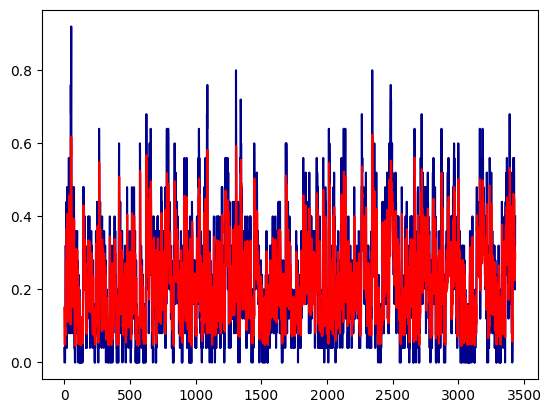

In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, CSVLogger

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=7,            
                               restore_best_weights=True)  


history = regressor.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping, csvlogger]) 

X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i])
    y_test.append(X[i])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = regressor.predict(X_test)

plt.plot(y_test, color = "darkblue")
plt.plot(y_pred, color = "red")
plt.show()

In [9]:
X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i])
    y_test.append(X[i])
    print(X[i-60:i].shape)
    break
X_test, y_test = np.array(X_test), np.array(y_test)
# print(X_test.shape)
# print(y_test.shape)

(60, 8)


In [15]:
regressor.save("./chekpoint_models/1d_output_model")  # Save the third model

INFO:tensorflow:Assets written to: ./chekpoint_models/1d_output_model\assets


INFO:tensorflow:Assets written to: ./chekpoint_models/1d_output_model\assets


#### New Code (With MSE)




Epoch 1/50

342/342 [==============================] - 20s 43ms/step - loss: 0.0162 - val_loss: 0.0124
Epoch 2/50
342/342 [==============================] - 14s 40ms/step - loss: 0.0114 - val_loss: 0.0093
Epoch 3/50
342/342 [==============================] - 13s 39ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 4/50
342/342 [==============================] - 13s 38ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 5/50
342/342 [==============================] - 13s 39ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 6/50
342/342 [==============================] - 14s 41ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 7/50
342/342 [==============================] - 13s 39ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 8/50
342/342 [==============================] - 13s 39ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 9/50
342/342 [==============================] - 13s 39ms/step - loss: 0.0088 - val_loss: 0.0086
Epoch 10/50
342/342 [==============================] - 14s 41ms/step - loss: 0

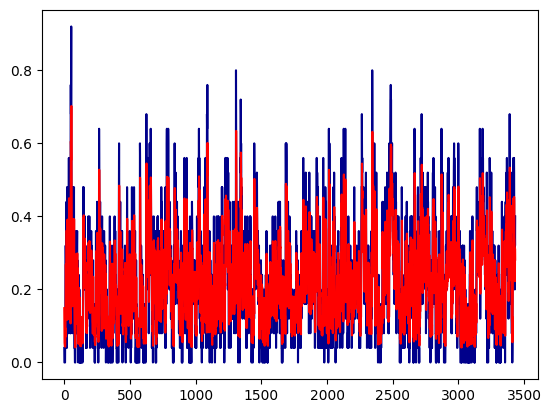

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, CSVLogger

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

csvlogger = CSVLogger("Kp_training_log.csv", append=True)

early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=7,            
                               restore_best_weights=True)  


history = regressor.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping, csvlogger]) 

X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i])
    y_test.append(X[i])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = regressor.predict(X_test)

plt.plot(y_test, color = "darkblue")
plt.plot(y_pred, color = "red")
plt.show()

In [13]:
# regressor.save("./chekpoint_models/1d_output_model_new")  # Save the third model
regressor.save("./chekpoint_models/1d_output_model_new.keras")

In [14]:
from keras.models import load_model

loaded_model = load_model("./chekpoint_models/1d_output_model_new.keras")

Import and test instead of re-train

In [11]:
import tensorflow as tf

regressor = tf.keras.models.load_model("./chekpoint_models/1d_output_model")

X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i])
    y_test.append(X[i])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)

(3433, 60, 1)


108/108 [==============================] - 6s 31ms/step
[[0.13444558]
 [0.08321777]
 [0.05226838]
 ...
 [0.23404449]
 [0.31431717]
 [0.28916162]] 0.13444558


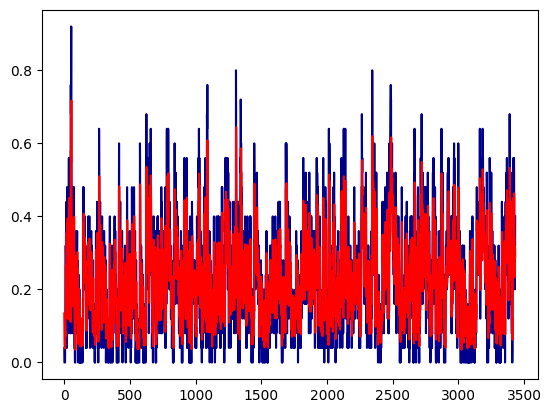

In [12]:
y_pred = regressor.predict(X_test)
print(y_pred, y_pred[0][0])
plt.plot(y_test, color = "darkblue")
plt.plot(y_pred, color = "red")
plt.show()

In [13]:
print(len(y_pred))

3433


In [9]:
# print mse 
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  0.010157716188031482


In [52]:
regressor.save("./chekpoint_models/1d_output_model")  # Save the third model

INFO:tensorflow:Assets written to: ./chekpoint_models/1d_output_model\assets


INFO:tensorflow:Assets written to: ./chekpoint_models/1d_output_model\assets


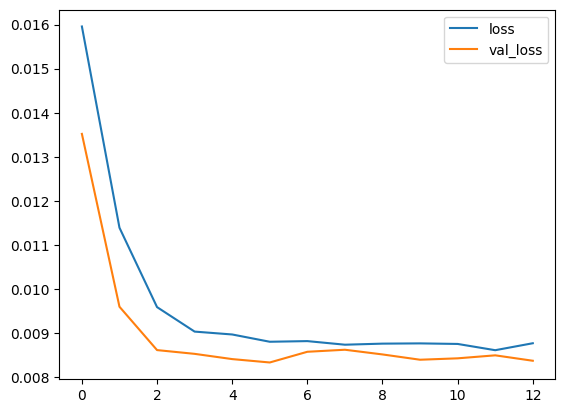

In [1]:
# Plot training log as loss by epoch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("Kp_training_log.csv")
df.head()

plt.plot(df["loss"], label="loss")
plt.plot(df["val_loss"], label="val_loss")
plt.legend()
plt.show()